### Importing Lib and Data Set

In [1]:
# Importing the Neccessary Libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [5]:
# Reading data 
df = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

df.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data EDA and Preprocessing

In [26]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [33]:
pd.unique(df.Hours)

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

In [35]:
pd.unique(df.Scores)

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
       67, 69, 54, 35, 76, 86], dtype=int64)

In [37]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


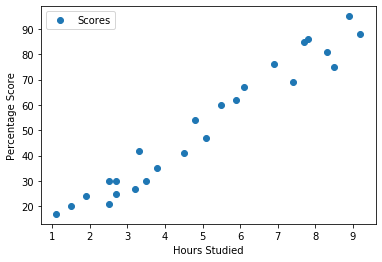

In [24]:
# Plotting the graph to see the relation between Hours Studied and Percentage Score
df.plot(x='Hours', y='Scores', style='o')    
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

###### Above graph shows that the relation between No of Hours studied and Percentage Scored is Positive and Linear in nature

##### Prearing the data into "attributes" (Inputs) and "labels" (outputs)

In [66]:
x = df.drop(['Scores'],axis = 1)
y = df['Scores']

In [67]:
x.shape

(25, 1)

In [68]:
y.shape

(25,)

In [69]:
from sklearn.model_selection import train_test_split  

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =.10, random_state = 10)

In [70]:
y_train.shape

(22,)

In [73]:
# Training the Algorithm

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

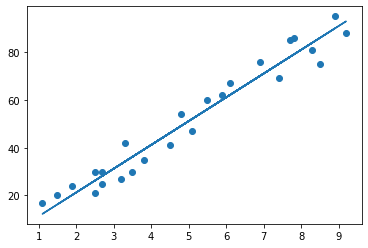

In [76]:
# Plotting the regression line

line = model.coef_*x+model.intercept_
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

## Making Prediction

What will be predicted score if a student studies for 9.25 hrs/ day?

In [79]:
print(x_test)

    Hours
5     1.5
1     5.1
13    3.3


In [81]:
y_pred = model.predict(x_test) #Predecting the score of the model

In [82]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
5,20,16.271686
1,47,52.097930
13,42,34.184808


In [85]:
model.predict([[9.5]]) #prediction for score if student studies 9.25 hrs/ day?

array([95.88556022])

The model predicts the student would score 95 if he studies for 9.25hrs/day

### Evaluating the Model

###### Checking the score or R Squared Value

In [86]:
model.score(x,y)

0.9525312713451517

Our model has 95% accuracy ! 

##### Mean Absolute Error

In [87]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.547145107959967
